In [1]:
%load_ext autoreload
%autoreload 2

---------------------------

## Config

In [2]:
import sys

In [3]:
project_dir = '/home/pmonteagudo/workspace/silencing_project'
if project_dir not in sys.path: 
    sys.path.append(project_dir)
from config_analysis import *

<font color='red'> **Attention!** for `H3K9me2` samples It's possible to use other directories than the default (e.g. `ChIP/h3k9me2`) </font>

In [4]:
#h3k9me2_analysis=False
h3k9me2_analysis=True

In [5]:
h3k9me2_dir = 'h3k9me2'
h3k9me2_dir = 'strict_mean_h3k9me2'
h3k9me2_dir = 'strict_median_h3k9me2'
#h3k9me2_dir = 'strict_q98_h3k9me2'

In [6]:
if not h3k9me2_analysis:
    #input_types = ['S2-ChIP-OIN', 'S2-ChIP-INPUT', 'H3K9me2']
    seq_assay = 'S2-ChIP'
else:
    #input_types = ['S2-ChIP-OIN', 'S2-ChIP-INPUT']
    seq_assay = "H3K9me2"

---------------------------

- Import dataframe containing **annotation of all samples**

In [7]:
sample_annotation_file = os.path.join(project_data_dir, 'seq_data', 'sample_annotation.csv')
sample_annotation_file

'/gcm-lfs1/pablo/data/rna_silencing/seq_data/sample_annotation.csv'

In [8]:
select_cols = ['sample_id', 'pipeline_type', 'seq_category', 'seq_type',  'mutant_id', 'mutant', 'replicate', 'batch', 'trimmed', 'halic_local_dir']

In [9]:
all_samples_df = pd.read_csv(sample_annotation_file, sep="\t", usecols=select_cols)[select_cols]
all_samples_df.head()

,sample_id,pipeline_type,seq_category,seq_type,mutant_id,mutant,replicate,batch,trimmed,halic_local_dir
0,1022_S2-ChIP-INPUT_1,ChIP,INPUT,S2-ChIP-INPUT,1022,mot2d,1,revision,False,Revision/Sequencing_Revision/ChIP/INPUT/
1,1022_S2-ChIP-OIN_1,ChIP,INPUT,S2-ChIP-OIN,1022,mot2d,1,revision,False,Revision/Sequencing_Revision/ChIP/INPUT/
2,1168_S2-ChIP-OIN_1,ChIP,INPUT,S2-ChIP-OIN,1168,caf1d*ccr4d*,1,revision,False,Revision/Sequencing_Revision/ChIP/INPUT/
3,301_S2-ChIP-INPUT_1,ChIP,INPUT,S2-ChIP-INPUT,301,swi6d,1,manuscript,False,Revision/INPUTs/
4,301_S2-ChIP-OIN_1,ChIP,INPUT,S2-ChIP-OIN,301,swi6d,1,revision,False,Revision/Sequencing_Revision/ChIP/INPUT/


In [10]:
all_samples_df.shape

(154, 10)

- **Ignore S2-RIP/S5-RIP samples** for now

In [11]:
# #all_samples_df = all_samples_df[all_samples_df['seq_type'] != 'S2-RIP']
# all_samples_df = all_samples_df[all_samples_df['seq_type'] != 'S5-RIP']
# all_samples_df.shape

- **Ignore S2-ChIP/S5-ChIP samples** for now

In [12]:
# #all_samples_df = all_samples_df[all_samples_df['seq_type'] != 'S2-ChIP']
# all_samples_df = all_samples_df[all_samples_df['seq_type'] != 'S5-ChIP']
# all_samples_df.shape

---------------------------

# Import **INPUT factor** Files: `INPUT_factors.csv`

---------------------------

In [13]:
#all_samples_df['seq_category'].unique()

- Filter for **ChIP samples**, which are the only ones that need the INPUT subtraction.

In [14]:
#chip_df = all_samples_df[all_samples_df['pipeline_type'] == 'ChIP']
#chip_df = chip_df[~chip_df['seq_type'].isin(input_types)]
chip_df = all_samples_df[all_samples_df['seq_type'] == seq_assay]
chip_df.shape

(9, 10)

- Add `input_factor_file` column for each mutant

In [15]:
chip_df['input_factor_file'] = chip_df.apply(
    lambda row: os.path.join(project_data_dir, 'seq_data', row.seq_category, 'INPUT_factors', row.sample_id, 'INPUT_factors.csv'), axis=1)

/home/pmonteagudo/anaconda3/envs/heterochromatin/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
chip_df.head()

,sample_id,pipeline_type,seq_category,seq_type,mutant_id,mutant,replicate,batch,trimmed,halic_local_dir,input_factor_file
137,WT_H3K9me2_1,ChIP,H3K9me2,H3K9me2,WT,wt,1,manuscript,False,2me_65/,/gcm-lfs1/pablo/data/rna_silencing/seq_data/H3...
138,301_H3K9me2_1,ChIP,H3K9me2,H3K9me2,301,swi6d,1,new-h3k9me2,False,NaN,/gcm-lfs1/pablo/data/rna_silencing/seq_data/H3...
139,302_H3K9me2_1,ChIP,H3K9me2,H3K9me2,302,clr3d,1,new-h3k9me3,False,NaN,/gcm-lfs1/pablo/data/rna_silencing/seq_data/H3...
140,324_H3K9me2_1,ChIP,H3K9me2,H3K9me2,324,chp2d,1,new-h3k9me4,False,NaN,/gcm-lfs1/pablo/data/rna_silencing/seq_data/H3...
141,491_H3K9me2_1,ChIP,H3K9me2,H3K9me2,491,mit1d,1,new-h3k9me5,False,NaN,/gcm-lfs1/pablo/data/rna_silencing/seq_data/H3...


In [17]:
chip_df.shape

(9, 11)

- Import **INPUT factors** Data Frames:

In [18]:
input_factors_df = pd.concat([pd.read_csv(ff, sep ='\t', index_col = False) 
                              for ff in chip_df['input_factor_file']], sort=False, axis = 0) # assume files are identical! sort=False

In [19]:
col_order = ['chip_id', 'input_id', 'method', 'chrom', 'input_factor']
input_factors_df = input_factors_df[col_order]

In [20]:
input_factors_df.head()

,chip_id,input_id,method,chrom,input_factor
0,WT_H3K9me2_1,WT_S2-ChIP-INPUT_1,linear_regression,SPAC23G3.02c,0.596361
1,WT_H3K9me2_1,WT_S2-ChIP-INPUT_1,global_lambda,SPAC23G3.02c,0.816043
2,WT_H3K9me2_1,WT_S2-ChIP-INPUT_1,linear_regression,SPCC737.08,0.600384
3,WT_H3K9me2_1,WT_S2-ChIP-INPUT_1,global_lambda,SPCC737.08,0.911388
4,WT_H3K9me2_1,WT_S2-ChIP-INPUT_1,linear_regression,SPAC1093.06c,0.535963


In [21]:
input_factors_df.shape

(92160, 5)

- Merge with sample **ChIP annotation** DataFrame

In [22]:
input_factors_df = pd.merge(input_factors_df, chip_df[['sample_id', 'mutant_id']], how='left', left_on='chip_id', right_on='sample_id').drop('sample_id', axis=1)

In [23]:
input_factors_df.head()
#input_factors_df.head(30)

,chip_id,input_id,method,chrom,input_factor,mutant_id
0,WT_H3K9me2_1,WT_S2-ChIP-INPUT_1,linear_regression,SPAC23G3.02c,0.596361,WT
1,WT_H3K9me2_1,WT_S2-ChIP-INPUT_1,global_lambda,SPAC23G3.02c,0.816043,WT
2,WT_H3K9me2_1,WT_S2-ChIP-INPUT_1,linear_regression,SPCC737.08,0.600384,WT
3,WT_H3K9me2_1,WT_S2-ChIP-INPUT_1,global_lambda,SPCC737.08,0.911388,WT
4,WT_H3K9me2_1,WT_S2-ChIP-INPUT_1,linear_regression,SPAC1093.06c,0.535963,WT


In [24]:
input_factors_df.shape

(92160, 6)

- **Store** dataframe containing annotation of all samples:

In [25]:
if not h3k9me2_analysis:
    input_factor_file = os.path.join(project_dir, 'results', 'INPUT_factors.csv')
else:
    input_factor_file = os.path.join(project_dir, 'results', h3k9me2_dir + '_INPUT_factors.csv')
input_factor_file

'/home/pmonteagudo/workspace/silencing_project/results/strict_median_h3k9me2_INPUT_factors.csv'

In [26]:
input_factors_df.to_csv(input_factor_file, sep="\t", index=False)

---------------------------

# Visualization

---------------------------

In [27]:
import seaborn as sns
#sns.set()

In [28]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

- Use only `global_lambda`s

In [29]:
#input_factors_df = input_factors_df[input_factors_df['method'] == 'global_lambda']

- Prepare Data Frame into **tidy format** for visualization using `seaborn`

In [30]:
id_vars = ['chip_id', 'input_id', 'method', 'chrom', 'mutant_id']

In [31]:
input_factors_tidy_df = input_factors_df

In [32]:
#splice_ratio_tidy_df.head()

In [33]:
#splice_ratio_tidy_df.shape

- Variables that can be used for plotting

In [34]:
#plot_vars = input_factors_tidy_df['mutant_id'].unique()
#plot_vars

## **A. Boxplot** - Median INPUT factor

- Prepare data for **Boxplots**

In [35]:
#plot_abs_vars = ['mutant_id']

In [36]:
input_factors_bp_plot = input_factors_tidy_df
input_factors_bp_plot.shape
#input_factors_bp_plot

(92160, 6)

- Visualize lambda factor **median** and **lower to upper quartile**

/home/pmonteagudo/workspace/silencing_project/results/H3K9me2_input_factors_bp_v2.pdf


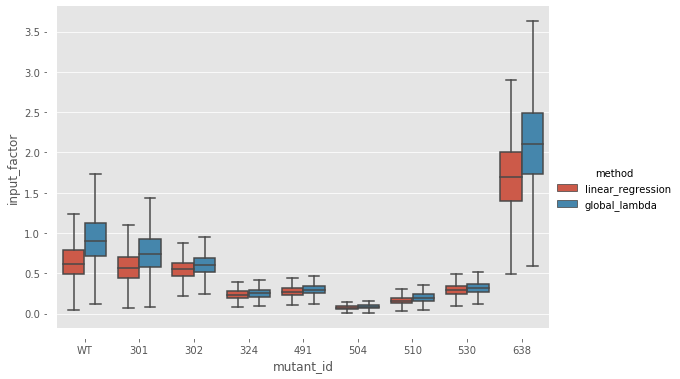

In [37]:
box_plot = sns.catplot(
    x="mutant_id", y="input_factor",
    hue="method",
    data=input_factors_bp_plot,
    kind="box",
    #estimator='mean',
    estimator='median',
    aspect=1.5,
    dodge=True,
    width=0.8,
    #showfliers=True
    showfliers=False ## remove outliers
) 
sns.despine(offset=10, trim=True)

#box_plot.set_xticklabels(rotation=45)

if not h3k9me2_analysis:
    input_factors_bp_fig = os.path.join(project_dir, 'results', 'input_factors_bp.pdf')
else:
    input_factors_bp_fig = os.path.join(project_dir, 'results', 'H3K9me2_input_factors_bp_v2.pdf')
print(input_factors_bp_fig)
box_plot.savefig(input_factors_bp_fig)

## **B. Distributions** - INPUT factor

- Prepare data for **Distribution plots**

In [38]:
max_input_factor = 3 # otherwise, due to outliers plots take for ever!

In [39]:
input_factors_dist_plot = input_factors_tidy_df[input_factors_tidy_df['input_factor'] < max_input_factor]
input_factors_dist_plot.shape

(91312, 6)

- Visualize lambda factor **distributions**

/home/pmonteagudo/workspace/silencing_project/results/H3K9me2_input_factors_dist.pdf


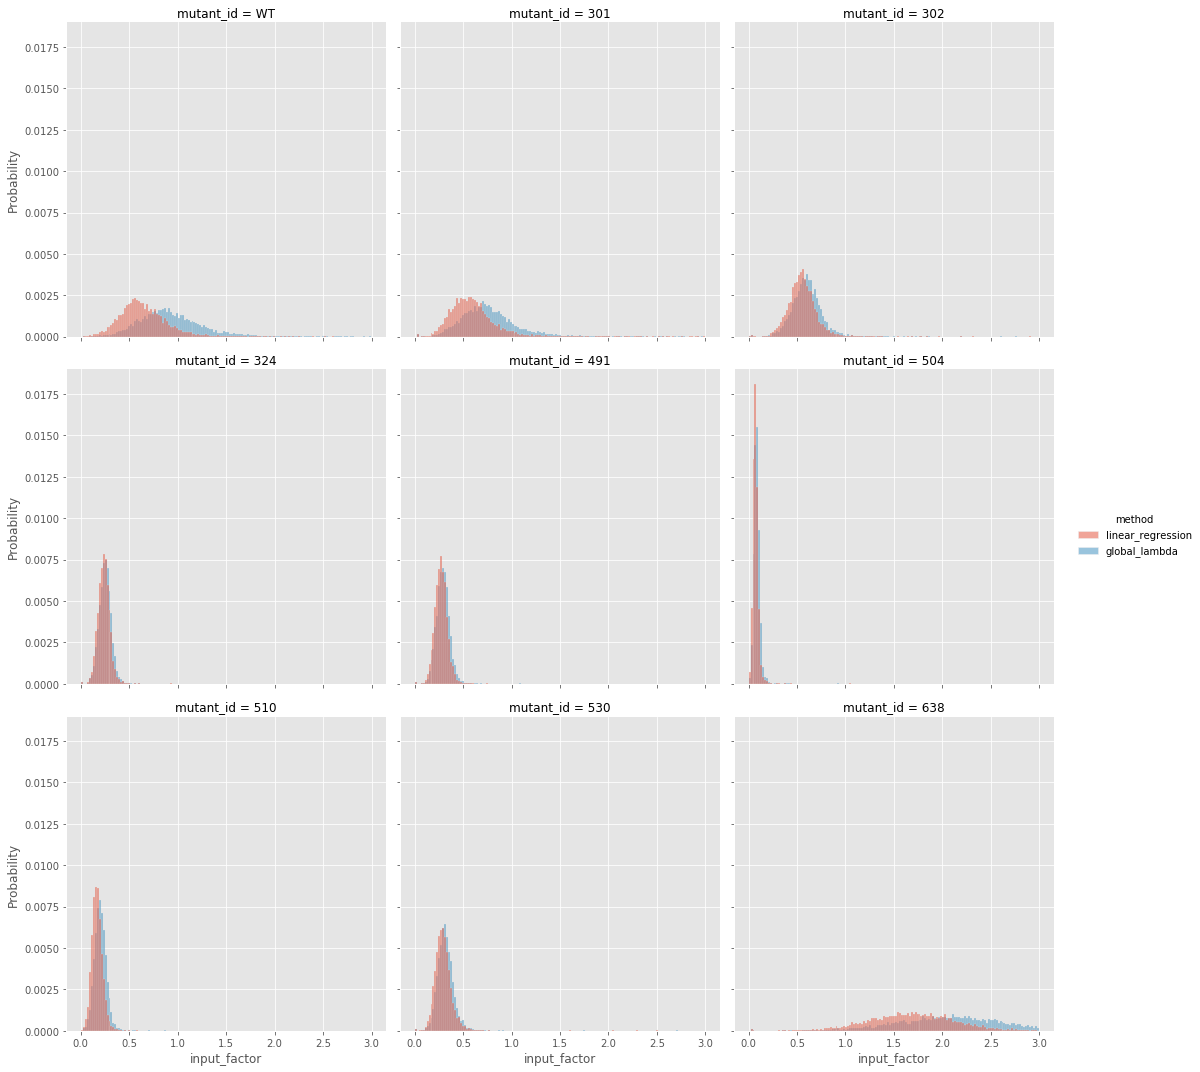

In [40]:
#sns.displot(input_factors_plot, x="input_factor", hue="method", stat="density", common_norm=False)
dist_plot = sns.displot(
    data=input_factors_dist_plot, 
    x="input_factor", 
    hue="method", 
    col="mutant_id",
    col_wrap=3,
    #col_wrap=4,
    stat="probability"
)

if not h3k9me2_analysis:
    input_factors_dist_fig = os.path.join(project_dir, 'results', 'input_factors_dist.pdf')
else:
    input_factors_dist_fig = os.path.join(project_dir, 'results', 'H3K9me2_input_factors_dist.pdf')
print(input_factors_dist_fig)
dist_plot.savefig(input_factors_dist_fig)

---------------------------

## Inspect Manually: INPUT factor > max_input_factor

In [41]:
#max_input_factor = 0.7
max_input_factor = 5

In [42]:
if_filtered = input_factors_tidy_df[input_factors_tidy_df['input_factor'] > max_input_factor]
if_filtered

,chip_id,input_id,method,chrom,input_factor,mutant_id
132,WT_H3K9me2_1,WT_S2-ChIP-INPUT_1,linear_regression,SPBCPT2R1.08c,186.246721,WT
133,WT_H3K9me2_1,WT_S2-ChIP-INPUT_1,global_lambda,SPBCPT2R1.08c,274.528392,WT
2744,WT_H3K9me2_1,WT_S2-ChIP-INPUT_1,linear_regression,SPAC8C9.04,5.565518,WT
2745,WT_H3K9me2_1,WT_S2-ChIP-INPUT_1,global_lambda,SPAC8C9.04,7.912957,WT
2900,WT_H3K9me2_1,WT_S2-ChIP-INPUT_1,linear_regression,SPBPB21E7.09,23.189326,WT
...,...,...,...,...,...,...
92127,638_H3K9me2_1,638_S2-ChIP-INPUT_1,global_lambda,SPAC29A4.22,5.723944,638
92150,638_H3K9me2_1,638_S2-ChIP-INPUT_1,linear_regression,SPBC1711.01c,62.942385,638
92151,638_H3K9me2_1,638_S2-ChIP-INPUT_1,global_lambda,SPBC1711.01c,67.537210,638
92152,638_H3K9me2_1,638_S2-ChIP-INPUT_1,linear_regression,SPBC23G7.17c,62.942385,638


In [43]:
if_filtered.shape

(389, 6)

In [44]:
if_filtered.groupby(['chrom']).size().sort_values(ascending=False).head(30)

chrom
SPAC750.08c      18
SPBCPT2R1.08c    17
SPBC23G7.09      16
SPBC1711.02      16
SPBC23G7.17c     14
SPBC1711.01c     14
SPCC330.05c      11
SPAC186.08c      10
SPAC186.07c      10
SPAC186.09       10
SPAC750.01       10
SPAC750.07c      10
SPAC186.05c       9
SPAC186.06        9
SPAC186.04c       8
SPBCPT2R1.04c     8
SPBCPT2R1.01c     8
SPAC750.06c       8
SPBCPT2R1.03      7
SPBC1348.15       7
SPBC23G7.11       6
SPAC750.05c       6
SPBC23G7.10c      6
SPAC13A11.03      6
SPBC32H8.11       6
SPAC186.03        6
SPAC750.03c       5
SPBCPT2R1.02      5
SPBPB2B2.16c      5
SPBPB2B2.19c      5
dtype: int64

--------------

**80_S2_ChIP2**: seems ok, it might be that INPUT has lower coverage than usual with respect to ChIP....

**80_S2_ChIP3**: seems ok, it might be that INPUT has lower coverage than usual with respect to ChIP....

--------------